# Building Perceptron from Scratch


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Dataset
# X = np.array([[0,0], [0,1], [1,0], [1,1]])
# y = np.array([0,0,0,1])

In [ ]:
iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
y = pd.DataFrame(iris_data.target).values # df here is the Bunch object from load_iris, which contains the target
y = np.where(y == 0, 0, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2, random_state=42)

In [ ]:
def init_perceptron(X, y, learning_rate = 0.01, epochs = 1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    learning_rate = learning_rate
    return weights, bias, learning_rate, epochs

In [ ]:
def activation_func(y):
  return np.where(y > 0, 1, 0)

In [ ]:
# sigmoid function
# def activation_func(y):
#   return 1 / (1 + math.exp(-y))

In [ ]:
def predict(X, weights, bias):
  linear_output = np.dot(X, weights) + bias
  y_pred = activation_func(linear_output)
  return y_pred

In [ ]:
def fit(X, y, weights, bias, learning_rate, epochs):
  for epoch in range(epochs):
    print(f"Epoch: {epoch + 1}")
    for x_i, target in zip(X, y):
      y_pred = predict(x_i, weights, bias)
      weights = weights + learning_rate * (target - y_pred) * x_i
      bias = bias + learning_rate * (target - y_pred)
    print(f"Weights: {weights}")
    print(f"Bias: {bias}")
    print("--------------------------")
  return weights, bias

In [ ]:
def train(X, y):
  weights, bias, learning_rate, epochs = init_perceptron(X, y, 0.01, 1000)
  weights, bias = fit(X, y, weights, bias, learning_rate, epochs)
  return weights, bias

In [ ]:
# Start
weights, bias = train(X_train, y_train)

Epoch: 1
Weights: [-0.007 -0.049  0.066  0.036]
Bias: -0.01
--------------------------
Epoch: 2
Weights: [-0.007 -0.049  0.066  0.036]
Bias: -0.01
--------------------------
Epoch: 3
Weights: [-0.007 -0.049  0.066  0.036]
Bias: -0.01
--------------------------
Epoch: 4
Weights: [-0.007 -0.049  0.066  0.036]
Bias: -0.01
--------------------------
Epoch: 5
Weights: [-0.007 -0.049  0.066  0.036]
Bias: -0.01
--------------------------
Epoch: 6
Weights: [-0.007 -0.049  0.066  0.036]
Bias: -0.01
--------------------------
Epoch: 7
Weights: [-0.007 -0.049  0.066  0.036]
Bias: -0.01
--------------------------
Epoch: 8
Weights: [-0.007 -0.049  0.066  0.036]
Bias: -0.01
--------------------------
Epoch: 9
Weights: [-0.007 -0.049  0.066  0.036]
Bias: -0.01
--------------------------
Epoch: 10
Weights: [-0.007 -0.049  0.066  0.036]
Bias: -0.01
--------------------------
Epoch: 11
Weights: [-0.007 -0.049  0.066  0.036]
Bias: -0.01
--------------------------
Epoch: 12
Weights: [-0.007 -0.049  0.066 

In [ ]:
weights

array([-0.007, -0.049,  0.066,  0.036])

In [ ]:
bias

np.float64(-0.01)

In [ ]:
y_pred = predict(X_test, weights, bias)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

<Axes: >

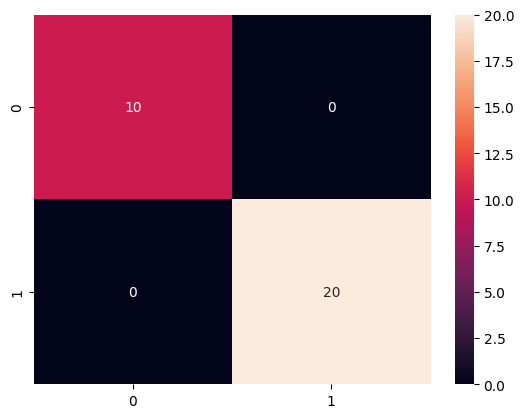

In [ ]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[interesting link](https://github.com/rasbt/stat479-deep-learning-ss19/tree/master)